# Importing Relevant Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print("done importing modules")

done importing modules


# Displaying how our data looks

In [ ]:
counter = 0

with open("heart.csv") as csvfile:
    filen = csv.reader(csvfile)
    for i_th in filen:
      print(i_th[0], i_th[1], i_th[2], i_th[3], i_th[4], i_th[5])
      counter += 1
      if counter >= 9:
          break

﻿age sex cp trestbps restecg target
63 1 3 145 0 1
37 1 2 130 1 1
41 0 1 130 0 1
56 1 1 120 1 1
57 0 0 120 1 1
57 1 0 140 1 1
56 0 1 140 0 1
44 1 1 120 1 1


In [ ]:
data = pd.read_csv('heart.csv')
print(data.describe())

              age         sex          cp    trestbps     restecg      target
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  131.623762    0.528053    0.544554
std      9.082101    0.466011    1.032052   17.538143    0.525860    0.498835
min     29.000000    0.000000    0.000000   94.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  120.000000    0.000000    0.000000
50%     55.000000    1.000000    1.000000  130.000000    1.000000    1.000000
75%     61.000000    1.000000    2.000000  140.000000    1.000000    1.000000
max     77.000000    1.000000    3.000000  200.000000    2.000000    1.000000


In [ ]:
y = data['target']
X = data.drop(['target'], axis = 1) #setting the columns as the labels, dropping the target which is a cluster of values

# Sample usage of splitting our dataset

In [ ]:
#Experimenting first with a 60-40 train/split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# print(X_train.shape, y_train.shape) #same row shapes
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
knn.predict(X_test) #predicts for the entire testing set
print("Manual Splitting Method")
print(knn.score(X_test, y_test))

print("\n")
print("Cross-Validation Method")
knn.fit(X_train,y_train)
cross_validation_scores = cross_val_score(knn, X, y, cv=5) #splits the actual dataset into 5 groups and scores it 5 different times 
print("Array of averaged scores", cross_validation_scores)
print(cross_validation_scores.mean())



#However, sklearn's cross-validation is a better approach since it randomly splits up the dataset into 'k' groups

Manual Splitting Method
0.5901639344262295


Cross-Validation Method
Array of averaged scores [0.52459016 0.73770492 0.6557377  0.53333333 0.63333333]
0.6169398907103825


# Hyperparameter Search

In [ ]:
#Hyperparameter Tuning, decided to use Grid Search
knn_second = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 25)} #dictionary of all the values we want to test
knn_testing = GridSearchCV(knn_second, param_grid, cv=5)
knn_testing.fit(X, y)
print(knn_testing.best_params_, knn_testing.best_score_) #{'n_neighbors': 1}, but choosing to set n_neighbors to 6 instead


{'n_neighbors': 1} 0.6206010928961748


# Hyperparameters data visualization

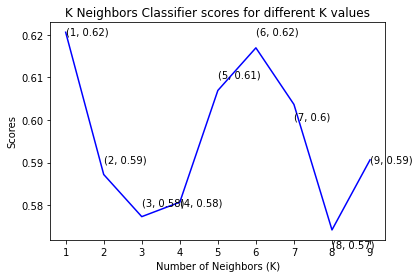

In [ ]:
knn_scores = []
for k in range(1,10):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=5)
    knn_scores.append(score.mean())
# print(knn_scores)

plt.plot([k for k in range(1, 10)], knn_scores, color = 'blue')
for i in range(1,10):
    plt.text(i, knn_scores[i-1].round(2), (i, knn_scores[i-1].round(2)))
plt.xticks([i for i in range(1, 10)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

# Predicting with Maanas' heart data


In [ ]:
participants = pd.read_csv('participants.csv')
maanas_y = data['target']
maanas_X = data.drop(['target'], axis = 1)

In [ ]:
maanas_guiltyornot = knn.predict(maanas_X)[0:1]
if maanas_guiltyornot > 0:
  print("Sorry, we regret to inform you that you have been diagnosed for one/more conditions of heart disease")
else: 
  print("It appears you're all good to go! ")

It appears you're all good to go! 
